<a href="https://colab.research.google.com/github/Imaspson/PyTorchLearning/blob/main/02_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
what_were_covering = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [4]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.1.0+cu118'

In [3]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [6]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [10]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """

  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

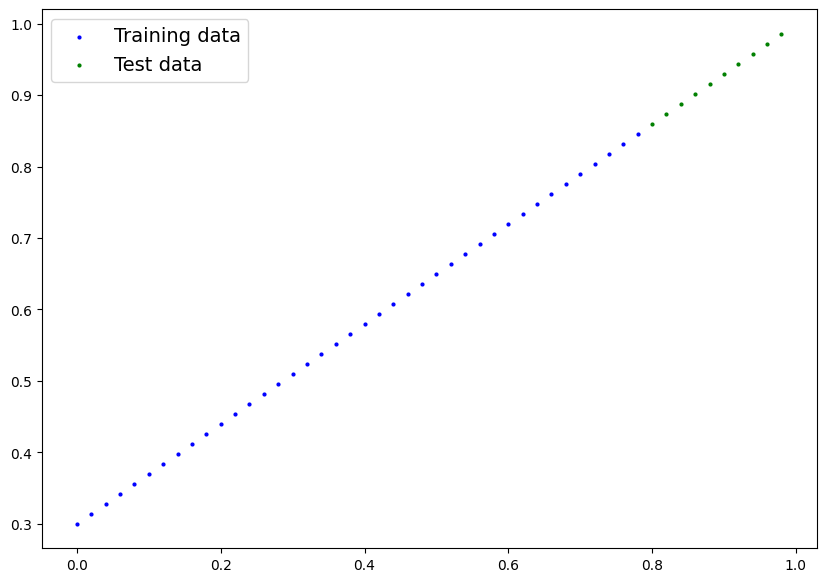

In [11]:
plot_predictions()

In [12]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            dtype=torch.float),
                                requires_grad=True)

    self.bias = nn.Parameter(torch.randn(1,
                                         dtype=torch.float),
                             requires_grad=True)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [14]:
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([-1.4416], requires_grad=True),
 Parameter containing:
 tensor([0.5233], requires_grad=True)]

In [16]:
model_0.state_dict()

OrderedDict([('weights', tensor([-1.4416])), ('bias', tensor([0.5233]))])

In [18]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)


In [19]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values: \n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values: 
tensor([[-0.6299],
        [-0.6587],
        [-0.6876],
        [-0.7164],
        [-0.7452],
        [-0.7741],
        [-0.8029],
        [-0.8317],
        [-0.8606],
        [-0.8894]])


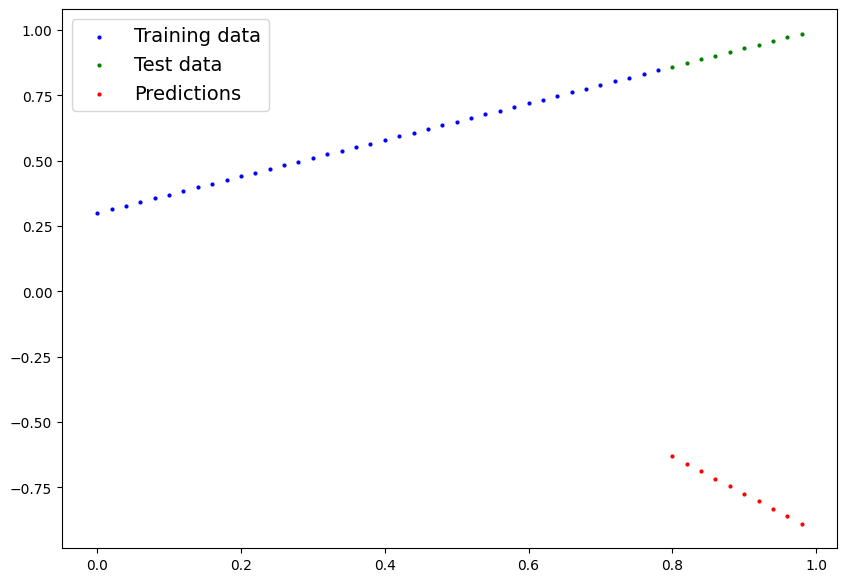

In [20]:
plot_predictions(predictions=y_preds)

In [21]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [26]:
epochs = 1000

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  ### Training

  model_0.train()
  y_pred = model_0(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Testing

  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test.type(torch.float))

    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.37300288677215576 | MAE Test Loss: 1.0153242349624634 
Epoch: 10 | MAE Train Loss: 0.3650391697883606 | MAE Test Loss: 0.9803234338760376 
Epoch: 20 | MAE Train Loss: 0.35842227935791016 | MAE Test Loss: 0.9492304921150208 
Epoch: 30 | MAE Train Loss: 0.3524976372718811 | MAE Test Loss: 0.9214385151863098 
Epoch: 40 | MAE Train Loss: 0.34745150804519653 | MAE Test Loss: 0.8969472050666809 
Epoch: 50 | MAE Train Loss: 0.3424054682254791 | MAE Test Loss: 0.8724561929702759 
Epoch: 60 | MAE Train Loss: 0.3382279574871063 | MAE Test Loss: 0.8539872169494629 
Epoch: 70 | MAE Train Loss: 0.334227979183197 | MAE Test Loss: 0.836187481880188 
Epoch: 80 | MAE Train Loss: 0.3302280902862549 | MAE Test Loss: 0.8183876276016235 
Epoch: 90 | MAE Train Loss: 0.3262281119823456 | MAE Test Loss: 0.8005879521369934 
Epoch: 100 | MAE Train Loss: 0.32253867387771606 | MAE Test Loss: 0.7875341176986694 
Epoch: 110 | MAE Train Loss: 0.319048672914505 | MAE Test Loss: 0.77651441

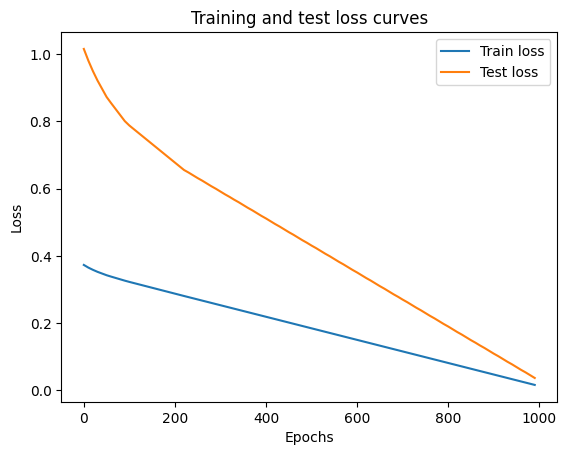

In [27]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();


In [29]:

print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6365])), ('bias', tensor([0.3268]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [31]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8360],
        [0.8487],
        [0.8615],
        [0.8742],
        [0.8869],
        [0.8997],
        [0.9124],
        [0.9251],
        [0.9379],
        [0.9506]])

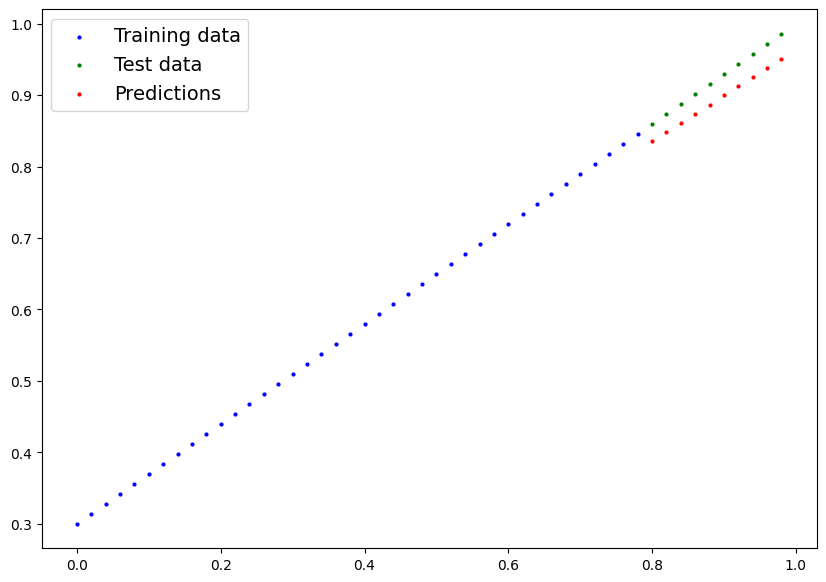

In [32]:
plot_predictions(predictions=y_preds)

In [33]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_PT.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_PT.pth
